In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
import gp2
from gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(verbose=True)

*** GP2  Unet ***
Working directory: /tmp/tmpf8stjqiwGP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/images.npy')
masks = np.load('/raid/mpsych/OMAMA/GP2/GP2TOYEXAMPLE_LARGE/masks.npy')

In [5]:
images.shape

(10000, 512, 512, 1)

In [6]:
masks.shape

(10000, 512, 512, 1)

In [7]:
R.run(images=images, masks=masks, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
8/8 [==============================] - 36s 3s/step - loss: 1.3688 - dice_coeff: 0.2615 - val_loss: 3.0276 - val_dice_coeff: 0.2055
Epoch 2/100
8/8 [==============================] - 12s 2s/step - loss: 1.1745 - dice_coeff: 0.3114 - val_loss: 2.4939 - val_dice_coeff: 0.2165
Epoch 3/100
8/8 [==============================] - 12s 2s/step - loss: 1.0867 - dice_coeff: 0.3413 - val_loss: 2.2184 - val_dice_coeff: 0.2253
Epoch 4/100
8/8 [==============================] - 12s 2s/step - loss: 1.0232 - dice_coeff: 0.3641 - val_loss: 2.0557 - val_dice_coeff: 0.2325
Epoch 5/100
8/8 [==============================] - 12s 2s/step - loss: 0.9848 - dice_coeff: 0.3785 - val_loss: 1.9965 - val_dice_coeff: 0.2371
Epoch 6/100
8/8 [==============================] - 12s 2s/step - loss: 0.9584 - dice_coeff: 0.3885 - val_loss: 1.8509 - val_dice_coeff: 0.2450
Epoch 7/100
8/8 [==============================] - 12s 2s/step - loss: 0.9325 - dice_coeff: 0.3994 - val_loss: 1.746

Epoch 58/100
8/8 [==============================] - 12s 2s/step - loss: 0.6870 - dice_coeff: 0.5157 - val_loss: 0.7017 - val_dice_coeff: 0.5047
Epoch 59/100
8/8 [==============================] - 17s 2s/step - loss: 0.6832 - dice_coeff: 0.5175 - val_loss: 0.7031 - val_dice_coeff: 0.5037
Epoch 60/100
8/8 [==============================] - 12s 2s/step - loss: 0.6815 - dice_coeff: 0.5184 - val_loss: 0.6977 - val_dice_coeff: 0.5051
Epoch 61/100
8/8 [==============================] - 17s 2s/step - loss: 0.6788 - dice_coeff: 0.5198 - val_loss: 0.6889 - val_dice_coeff: 0.5112
Epoch 62/100
8/8 [==============================] - 12s 2s/step - loss: 0.6758 - dice_coeff: 0.5217 - val_loss: 0.6904 - val_dice_coeff: 0.5102
Epoch 63/100
8/8 [==============================] - 12s 2s/step - loss: 0.6743 - dice_coeff: 0.5224 - val_loss: 0.6904 - val_dice_coeff: 0.5093
Epoch 64/100
8/8 [==============================] - 12s 2s/step - loss: 0.6715 - dice_coeff: 0.5237 - val_loss: 0.6845 - val_dice_coeff:

11/11 [==============================] - 14s 1s/step - loss: 0.5498 - dice_coeff: 0.5936 - val_loss: 0.5708 - val_dice_coeff: 0.5798
Epoch 11/100
11/11 [==============================] - 14s 1s/step - loss: 0.5463 - dice_coeff: 0.5958 - val_loss: 0.5633 - val_dice_coeff: 0.5850
Epoch 12/100
11/11 [==============================] - 15s 1s/step - loss: 0.5433 - dice_coeff: 0.5976 - val_loss: 0.5651 - val_dice_coeff: 0.5830
Epoch 13/100
11/11 [==============================] - 14s 1s/step - loss: 0.5401 - dice_coeff: 0.5996 - val_loss: 0.5592 - val_dice_coeff: 0.5873
Epoch 14/100
11/11 [==============================] - 15s 1s/step - loss: 0.5366 - dice_coeff: 0.6019 - val_loss: 0.5595 - val_dice_coeff: 0.5862
Epoch 15/100
11/11 [==============================] - 14s 1s/step - loss: 0.5331 - dice_coeff: 0.6038 - val_loss: 0.5574 - val_dice_coeff: 0.5879
Epoch 16/100
11/11 [==============================] - 14s 1s/step - loss: 0.5327 - dice_coeff: 0.6044 - val_loss: 0.5437 - val_dice_coeff

11/11 [==============================] - 20s 2s/step - loss: 0.3739 - dice_coeff: 0.7096 - val_loss: 0.3954 - val_dice_coeff: 0.6979
Epoch 67/100
11/11 [==============================] - 20s 2s/step - loss: 0.3713 - dice_coeff: 0.7117 - val_loss: 0.3970 - val_dice_coeff: 0.6971
Epoch 68/100
11/11 [==============================] - 19s 2s/step - loss: 0.3685 - dice_coeff: 0.7136 - val_loss: 0.3926 - val_dice_coeff: 0.6998
Epoch 69/100
11/11 [==============================] - 20s 2s/step - loss: 0.3655 - dice_coeff: 0.7158 - val_loss: 0.3950 - val_dice_coeff: 0.6981
Epoch 70/100
11/11 [==============================] - 14s 1s/step - loss: 0.3628 - dice_coeff: 0.7176 - val_loss: 0.3896 - val_dice_coeff: 0.7025
Epoch 71/100
11/11 [==============================] - 20s 2s/step - loss: 0.3601 - dice_coeff: 0.7197 - val_loss: 0.3933 - val_dice_coeff: 0.6989
Epoch 72/100
11/11 [==============================] - 19s 2s/step - loss: 0.3570 - dice_coeff: 0.7217 - val_loss: 0.3854 - val_dice_coeff

Epoch 19/100
15/15 [==============================] - 22s 2s/step - loss: 0.2287 - dice_coeff: 0.8180 - val_loss: 0.2586 - val_dice_coeff: 0.8013
Epoch 20/100
15/15 [==============================] - 17s 1s/step - loss: 0.2261 - dice_coeff: 0.8188 - val_loss: 0.2610 - val_dice_coeff: 0.7991
Epoch 21/100
15/15 [==============================] - 17s 1s/step - loss: 0.2232 - dice_coeff: 0.8210 - val_loss: 0.2558 - val_dice_coeff: 0.8037
Epoch 22/100
15/15 [==============================] - 17s 1s/step - loss: 0.2208 - dice_coeff: 0.8155 - val_loss: 0.2619 - val_dice_coeff: 0.8054
Epoch 23/100
15/15 [==============================] - 17s 1s/step - loss: 0.2172 - dice_coeff: 0.8251 - val_loss: 0.2495 - val_dice_coeff: 0.8087
Epoch 24/100
15/15 [==============================] - 22s 2s/step - loss: 0.2134 - dice_coeff: 0.8267 - val_loss: 0.2508 - val_dice_coeff: 0.8076
Epoch 25/100
15/15 [==============================] - 17s 1s/step - loss: 0.2112 - dice_coeff: 0.8283 - val_loss: 0.2471 - v

15/15 [==============================] - 17s 1s/step - loss: 0.0992 - dice_coeff: 0.9217 - val_loss: 0.1372 - val_dice_coeff: 0.9017
Epoch 76/100
15/15 [==============================] - 22s 2s/step - loss: 0.0979 - dice_coeff: 0.9226 - val_loss: 0.1478 - val_dice_coeff: 0.8973
Epoch 77/100
15/15 [==============================] - 17s 1s/step - loss: 0.0965 - dice_coeff: 0.9194 - val_loss: 0.1354 - val_dice_coeff: 0.9024
Epoch 78/100
15/15 [==============================] - 17s 1s/step - loss: 0.0945 - dice_coeff: 0.9241 - val_loss: 0.1433 - val_dice_coeff: 0.8980
Epoch 79/100
15/15 [==============================] - 17s 1s/step - loss: 0.0929 - dice_coeff: 0.9246 - val_loss: 0.1309 - val_dice_coeff: 0.9062
Epoch 80/100
15/15 [==============================] - 17s 1s/step - loss: 0.0909 - dice_coeff: 0.9252 - val_loss: 0.1381 - val_dice_coeff: 0.9016
Epoch 81/100
15/15 [==============================] - 17s 1s/step - loss: 0.0893 - dice_coeff: 0.9291 - val_loss: 0.1343 - val_dice_coeff

Epoch 28/100
18/18 [==============================] - 20s 1s/step - loss: 0.0409 - dice_coeff: 0.9680 - val_loss: 0.0885 - val_dice_coeff: 0.9457
Epoch 29/100
18/18 [==============================] - 20s 1s/step - loss: 0.0384 - dice_coeff: 0.9706 - val_loss: 0.0825 - val_dice_coeff: 0.9497
Epoch 30/100
18/18 [==============================] - 25s 1s/step - loss: 0.0378 - dice_coeff: 0.9712 - val_loss: 0.0865 - val_dice_coeff: 0.9478
Epoch 31/100
18/18 [==============================] - 20s 1s/step - loss: 0.0371 - dice_coeff: 0.9709 - val_loss: 0.0840 - val_dice_coeff: 0.9486
Epoch 32/100
18/18 [==============================] - 20s 1s/step - loss: 0.0365 - dice_coeff: 0.9722 - val_loss: 0.1075 - val_dice_coeff: 0.9374
Epoch 33/100
18/18 [==============================] - 20s 1s/step - loss: 0.0361 - dice_coeff: 0.9724 - val_loss: 0.0948 - val_dice_coeff: 0.9450
Epoch 34/100
18/18 [==============================] - 20s 1s/step - loss: 0.0353 - dice_coeff: 0.9730 - val_loss: 0.0873 - v

18/18 [==============================] - 20s 1s/step - loss: 0.0131 - dice_coeff: 0.9902 - val_loss: 0.0723 - val_dice_coeff: 0.9636
Epoch 85/100
18/18 [==============================] - 20s 1s/step - loss: 0.0124 - dice_coeff: 0.9909 - val_loss: 0.0772 - val_dice_coeff: 0.9619
Epoch 86/100
18/18 [==============================] - 20s 1s/step - loss: 0.0122 - dice_coeff: 0.9909 - val_loss: 0.0742 - val_dice_coeff: 0.9633
Epoch 87/100
18/18 [==============================] - 25s 1s/step - loss: 0.0122 - dice_coeff: 0.9912 - val_loss: 0.0779 - val_dice_coeff: 0.9619
Epoch 88/100
18/18 [==============================] - 25s 1s/step - loss: 0.0118 - dice_coeff: 0.9914 - val_loss: 0.0755 - val_dice_coeff: 0.9632
Epoch 89/100
18/18 [==============================] - 20s 1s/step - loss: 0.0116 - dice_coeff: 0.9916 - val_loss: 0.0741 - val_dice_coeff: 0.9638
Epoch 90/100
18/18 [==============================] - 20s 1s/step - loss: 0.0118 - dice_coeff: 0.9915 - val_loss: 0.0745 - val_dice_coeff

24/24 [==============================] - 30s 1s/step - loss: 0.0078 - dice_coeff: 0.9948 - val_loss: 0.0809 - val_dice_coeff: 0.9651
Epoch 16/100
24/24 [==============================] - 25s 1s/step - loss: 0.0076 - dice_coeff: 0.9950 - val_loss: 0.0736 - val_dice_coeff: 0.9681
Epoch 17/100
24/24 [==============================] - 25s 1s/step - loss: 0.0074 - dice_coeff: 0.9951 - val_loss: 0.0740 - val_dice_coeff: 0.9679
Epoch 18/100
24/24 [==============================] - 25s 1s/step - loss: 0.0075 - dice_coeff: 0.9950 - val_loss: 0.0751 - val_dice_coeff: 0.9677
Epoch 19/100
24/24 [==============================] - 25s 1s/step - loss: 0.0075 - dice_coeff: 0.9951 - val_loss: 0.0762 - val_dice_coeff: 0.9673
Model saved to /tmp/tmpf8stjqiwGP2/unet_5.model
History saved to /tmp/tmpf8stjqiwGP2/history_5.pickle
Testing the classifier...
94/94 [==============================] - 10s 103ms/step - loss: 0.0765 - dice_coeff: 0.9669
Testing the discriminator...
19/19 [===========================

30/30 [==============================] - 30s 1s/step - loss: 0.0067 - dice_coeff: 0.9959 - val_loss: 0.0797 - val_dice_coeff: 0.9692
Epoch 7/100
30/30 [==============================] - 36s 1s/step - loss: 0.0063 - dice_coeff: 0.9961 - val_loss: 0.0750 - val_dice_coeff: 0.9702
Epoch 8/100
30/30 [==============================] - 30s 1s/step - loss: 0.0058 - dice_coeff: 0.9963 - val_loss: 0.0783 - val_dice_coeff: 0.9695
Epoch 9/100
30/30 [==============================] - 30s 1s/step - loss: 0.0057 - dice_coeff: 0.9963 - val_loss: 0.0786 - val_dice_coeff: 0.9696
Epoch 10/100
30/30 [==============================] - 36s 1s/step - loss: 0.0054 - dice_coeff: 0.9965 - val_loss: 0.0781 - val_dice_coeff: 0.9697
Epoch 11/100
30/30 [==============================] - 30s 1s/step - loss: 0.0053 - dice_coeff: 0.9965 - val_loss: 0.0730 - val_dice_coeff: 0.9713
Epoch 12/100
30/30 [==============================] - 36s 1s/step - loss: 0.0055 - dice_coeff: 0.9964 - val_loss: 0.0743 - val_dice_coeff: 0

In [8]:
R.classifier_scores

[[0.6065896153450012, 0.557788074016571],
 [0.3201085329055786, 0.752804696559906],
 [0.11551877856254578, 0.9215946793556213],
 [0.0790812149643898, 0.9627172350883484],
 [0.07679016888141632, 0.965049684047699],
 [0.07645629346370697, 0.9668667316436768],
 [0.08097820729017258, 0.9685947299003601],
 [0.07740432024002075, 0.9699302911758423]]

In [9]:
R.discriminator_scores

[[1.1290757656097412, 0.5066666603088379],
 [1.184672236442566, 0.4933333396911621],
 [1.155120849609375, 0.4933333396911621],
 [1.147597074508667, 0.4983333349227905],
 [1.1526848077774048, 0.49666666984558105],
 [1.1395926475524902, 0.5],
 [1.2005670070648193, 0.47333332896232605],
 [1.1459369659423828, 0.5016666650772095]]

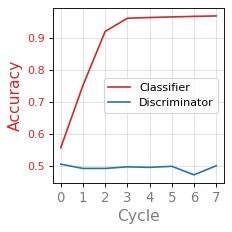

In [10]:
R.plot()